# Time Series Data Analysis-1

## Overview
### Objective
The goal of this notebook is to conduct a comprehensive analysis of historical time series data pertaining to the power grid frequency in Great Britain over the years 2016 to 2018. Grid frequency is a critical parameter in power systems, reflecting the balance between electricity supply and demand. Maintaining the frequency close to its nominal value (50 Hz in Europe and China, 60 Hz in the USA) is essential for the stable operation of the grid. Grid operators continuously monitor frequency to ensure real-time reliability and to prevent blackouts or equipment damage. This analysis will utilize powerful data analysis and visualization tools such as pandas, matplotlib, and seaborn to explore and visualize the frequency data. The objectives include identifying trends, patterns, and anomalies, as well as computing key statistical metrics. This will provide valuable insights into the grid's performance and help in understanding the underlying dynamics of frequency variations over different time periods. 
Source of data: https://www.neso.energy/industry-information/balancing-services/frequency-response-services/historic-frequency-data

### Purpose
1. Statistical Exploration
   - Compute key metrics like mean, standard deviation, skewness, and custom frequency reliability metrics (e.g., CPS1) to understand data behavior.
   - Identify patterns and anomalies over time.
2. Visualization:
   - Create time-series plots, histograms, kernel density plots, and boxplots to visually represent data trends and distributions.
3. Anomaly and Outlier Detection:
    - Detect and quantify deviations from expected values using threshold probabilities and outlier analysis based on the interquartile range (IQR).
5. Granular and Aggregated Analysis:
    - Analyze data for specific months (detailed analysis).
    - Compare data across multiple years and months (aggregated analysis).
7. User Interactivity:
   - Allow users to input a specific year and month for tailored analysis, making the notebook flexible and reusable for different datasets.

### Who would benefit from this notebook?
- Data Analysts: Seeking to understand trends and anomalies in frequency-based time-series data.
- Researchers: Investigating seasonal or yearly variations in frequency data for scientific studies.
- Decision Makers: Looking to interpret metrics like CPS1 for operational insights or system performance.
- Engineers/Scientists: Analyzing time-sensitive processes where frequency trends are critical for optimization or anomaly detection.

### Applications
1. System Monitoring:
   - Analyze how a monitored system's frequency behaves under normal or abnormal conditions.
3. Seasonal Trend Analysis:
   - Identify how frequency data changes over months and years, useful for industries like energy, telecommunications, or climate monitoring.
5. Anomaly and Performance Analysis:
   - Detect periods of unusual activity or performance deviations using custom metrics (CPS1) and statistical thresholds.
7. Granular Insights:
   - Leverage 10-minute resampling to uncover trends that daily or monthly summaries might miss.

In [1]:
import sys
!{sys.executable} -m pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

!git submodule update --init --recursive

### Data Loading
Dynamically select and load CSV files based on user input for year and month.
Data for individual months or years is loaded into dataframes for further processing.

In [2]:
# An xample, you can enter other yer and month among 2016-2018. To be compatible for html rendering.
year = 16
month = 6

In [3]:
csv_path = f"f 20{year} {month}.csv"
csv_path

'f 2016 6.csv'

In [4]:
import os
current_dir = os.getcwd()
data_path = "solar-data/pv-data"
csv_fullpath = os.path.join(current_dir, data_path, csv_path)

df = pd.read_csv(csv_fullpath)
df

,dtm,f
0,2016-06-01 01:00:00 +0100,50.019
1,2016-06-01 01:00:01 +0100,50.018
2,2016-06-01 01:00:02 +0100,50.016
3,2016-06-01 01:00:03 +0100,50.004
4,2016-06-01 01:00:04 +0100,49.995
...,...,...
2591995,2016-07-01 00:59:55 +0100,50.074
2591996,2016-07-01 00:59:56 +0100,50.073
2591997,2016-07-01 00:59:57 +0100,50.071
2591998,2016-07-01 00:59:58 +0100,50.065


## Analysis
Compute the statistical measures such as mean, standard deviation and skewness

In [5]:
mean_value = df['f'].mean()
std_dev = df['f'].std()
skew_ness = df['f'].skew()
print(mean_value)
print(std_dev)
print(skew_ness)

49.999848150077135
0.05436332709601114
0.17052949283325863


## Data Visualization
Generate various plots to visualize trends and distributions, including:
1. Time-Series Plots: Show how frequency changes over days or months.
2. Histograms and KDE Plots: Reveal the frequency distribution and probabilities of threshold crossings.
3. Boxplots: Identify outliers and summarize data spread.
4. Trend Analysis: Compare statistical metrics (mean, standard deviation, skewness) across months and years. 

Text(0, 0.5, 'Frequency')

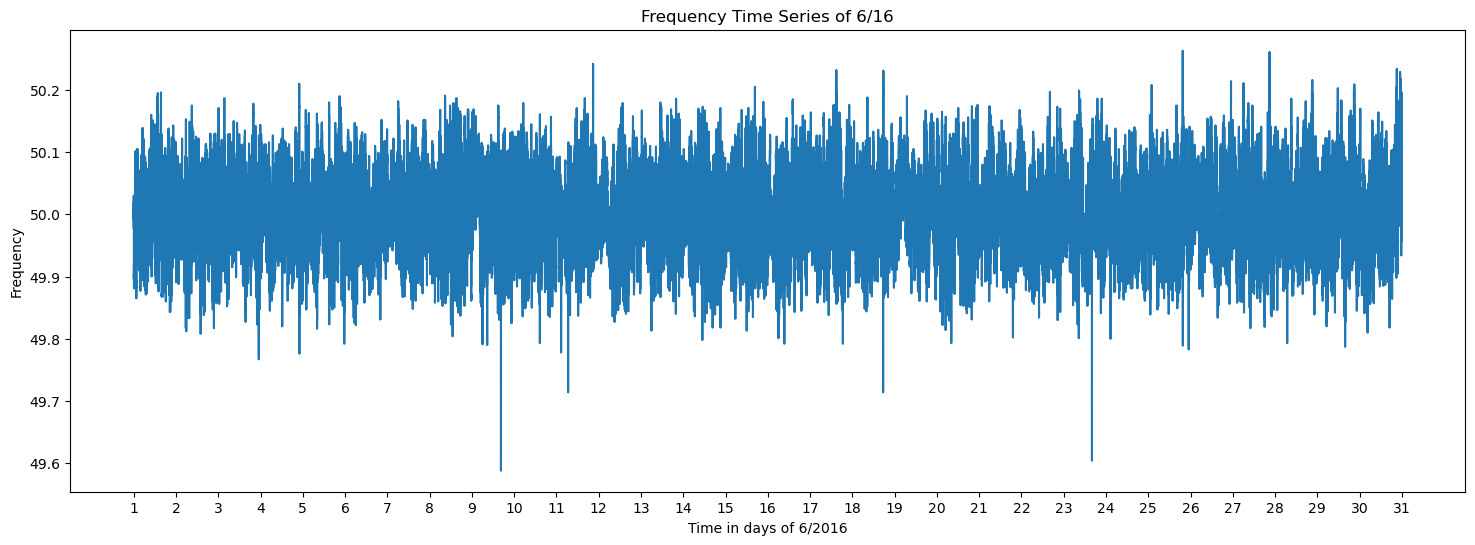

In [6]:
plt.figure(figsize=(18, 6))
plt.plot(df['f'])
plt.xticks(ticks=[i*86400 for i in range(31)], labels=[str(i) for i in range(1, 32)])
plt.title(f'Frequency Time Series of {month}/{year}')
plt.xlabel(f'Time in days of {month}/20{year}')
plt.ylabel('Frequency')

Drawing a frequency distribution graph, also evaluating the probabilities of frequency values falling below or above 49.1 and 50.1 to search for outliers.

In [7]:
prob_49_9 = (df['f'] < 49.9).mean()
prob_50_1 = (df['f'] > 50.1).mean()

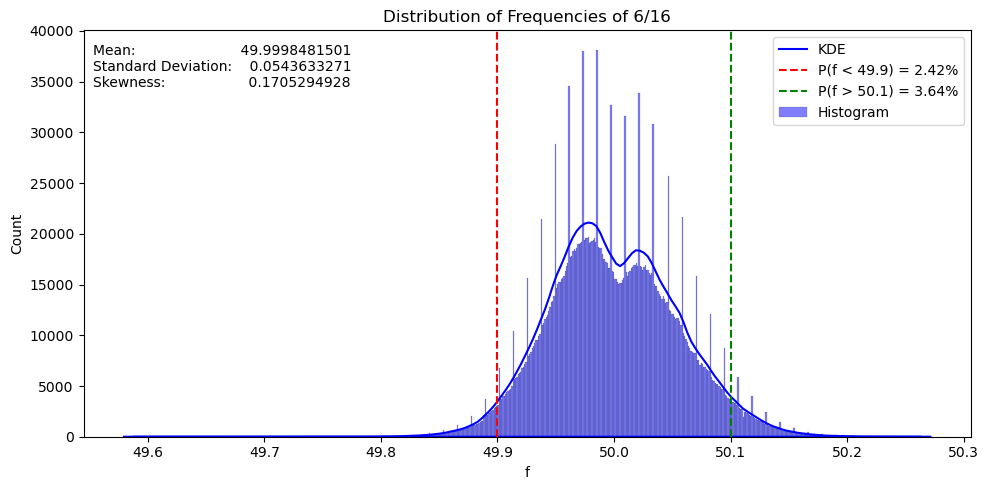

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['f'], kde=True, label='Histogram', color='blue')
sns.kdeplot(df['f'], color='blue', label='KDE')

plt.axvline(x=49.9, color='red', linestyle='--', label=f'P(f < 49.9) = {prob_49_9:.2%}')
plt.axvline(x=50.1, color='green', linestyle='--', label=f'P(f > 50.1) = {prob_50_1:.2%}')

plt.fill_between(df['f'], 0, 1, where=(df['f'] < 49.9), color='red', alpha=0.2)
plt.fill_between(df['f'], 0, 1, where=(df['f'] > 50.1), color='green', alpha=0.2)

plt.text(x=0.01, y=0.94, s=f'Mean:                        {mean_value:.10f}', transform=plt.gca().transAxes, fontsize=10)
plt.text(x=0.01, y=0.90, s=f'Standard Deviation:    {std_dev:.10f}', transform=plt.gca().transAxes, fontsize=10)
plt.text(x=0.01, y=0.86, s=f'Skewness:                   {skew_ness:.10f}', transform=plt.gca().transAxes, fontsize=10)

plt.title(f'Distribution of Frequencies of {month}/{year}')
plt.legend()
plt.tight_layout()
plt.show()

Drawing a boxplot for better visualization and outlier detection.  
Use of the interquartile range (IQR) method to detect outliers.

In [9]:
Q1 = np.percentile(df['f'], 25)
Q3 = np.percentile(df['f'], 75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
up_outliers = df[df['f'] > upper_whisker]
low_outliers = df[df['f'] < lower_whisker]
prob_up = len(up_outliers)/len(df)
prob_low = len(low_outliers)/len(df)

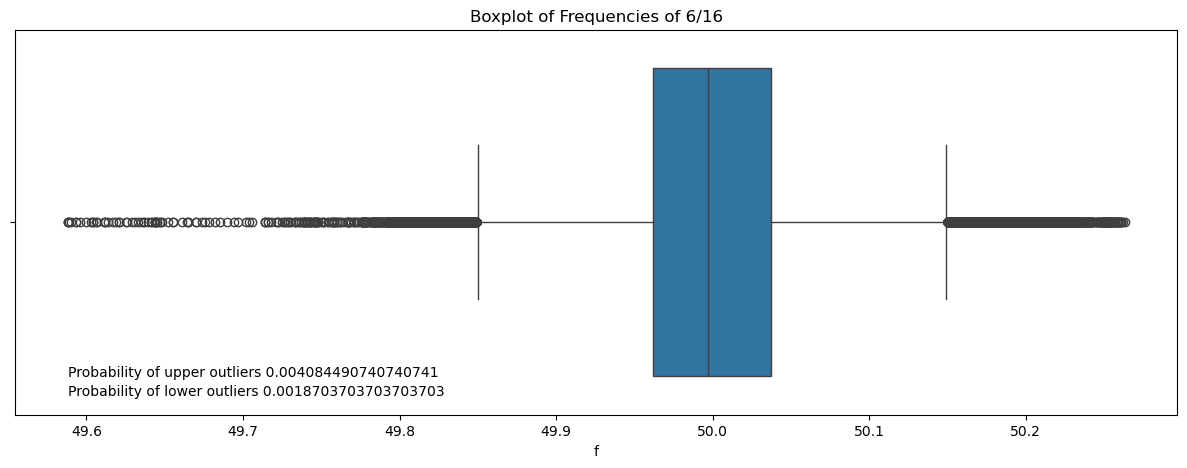

In [10]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['f'])
plt.title(f'Boxplot of Frequencies of {month}/{year}')
plt.text(df['f'].min(),0.4, f'Probability of upper outliers {prob_up}', fontsize=10)
plt.text(df['f'].min(),0.45, f'Probability of lower outliers {prob_low}', fontsize=10)
plt.show()

## Resampling and Aggregation
The data is resampled into 10-minute intervals for finer-grained analysis.
Similar calculations and visualizations are applied to the resampled data.

In [11]:
df['dtm'] = pd.to_datetime(df['dtm'], utc=True)
df_10min = df.resample('10min', on='dtm').mean()

Text(0, 0.5, 'Average frequency of 10 minute intervals')

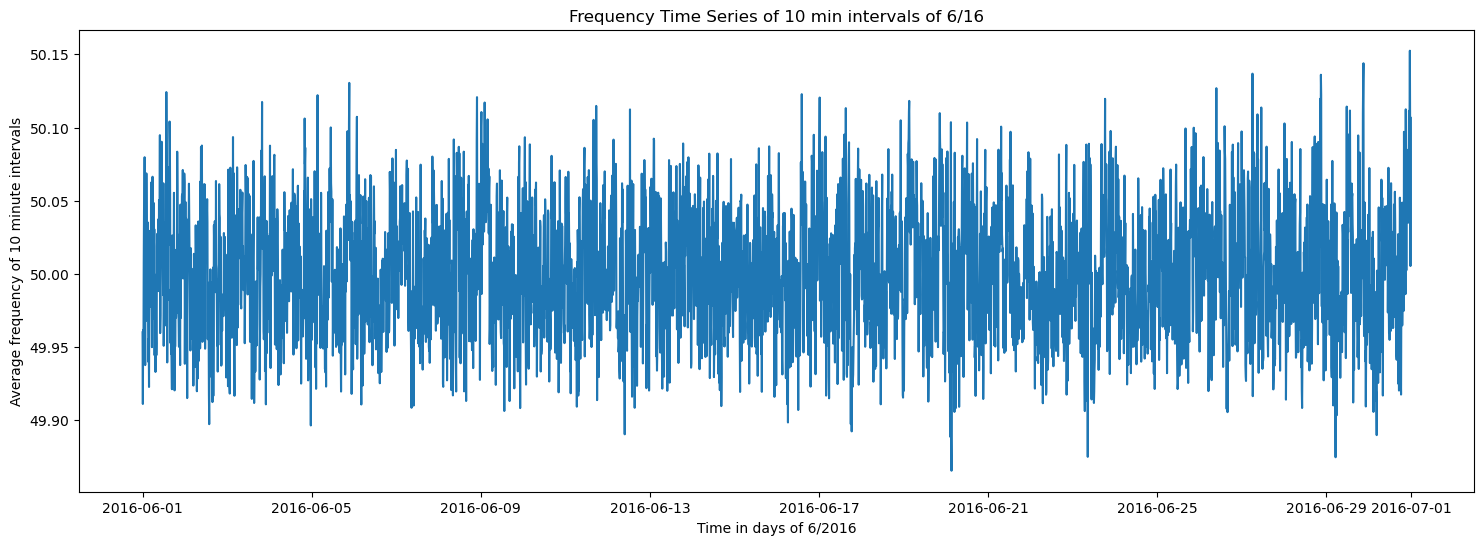

In [12]:
plt.figure(figsize=(18, 6))
plt.plot(df_10min)
plt.title(f'Frequency Time Series of 10 min intervals of {month}/{year}')
plt.xlabel(f'Time in days of {month}/20{year}')
plt.ylabel('Average frequency of 10 minute intervals')

In [13]:
prob_49_9_10min = (df_10min < 49.9).mean()
prob_50_1_10min = (df_10min > 50.1).mean()

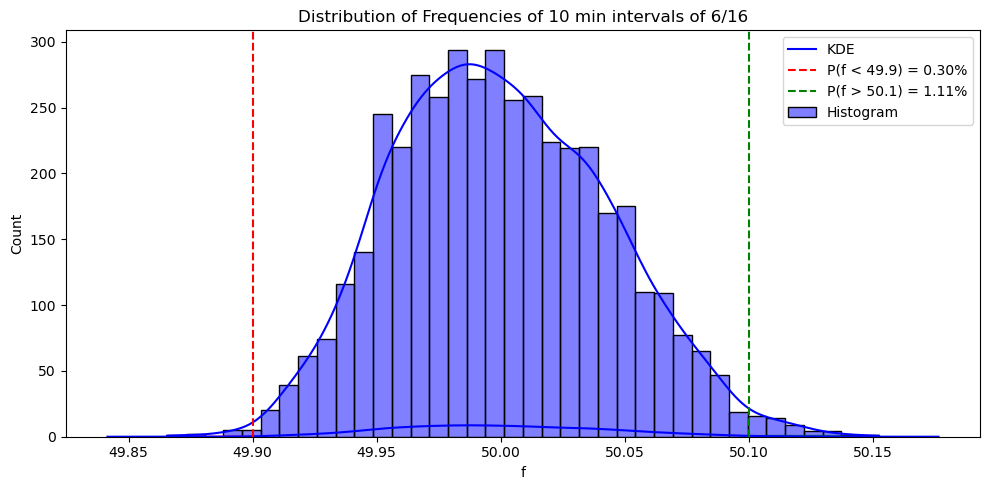

In [14]:
plt.figure(figsize=(10, 5))
prob_49_9_10min = prob_49_9_10min.iloc[0] if isinstance(prob_49_9_10min, pd.Series) else prob_49_9_10min
prob_50_1_10min = prob_50_1_10min.iloc[0] if isinstance(prob_50_1_10min, pd.Series) else prob_50_1_10min

sns.histplot(df_10min['f'], kde=True, label='Histogram', color='blue')
sns.kdeplot(df_10min['f'], color='blue', label='KDE')

plt.axvline(x=49.9, color='red', linestyle='--', label=f'P(f < 49.9) = {prob_49_9_10min:.2%}')
plt.axvline(x=50.1, color='green', linestyle='--', label=f'P(f > 50.1) = {prob_50_1_10min:.2%}')

plt.fill_between(df_10min['f'], 0, 1, where=(df_10min['f'] < 49.9), color='red', alpha=0.2)
plt.fill_between(df_10min['f'], 0, 1, where=(df_10min['f'] > 50.1), color='green', alpha=0.2)

plt.title(f'Distribution of Frequencies of 10 min intervals of {month}/{year}')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
Q1 = np.percentile(df_10min['f'], 25)
Q3 = np.percentile(df_10min['f'], 75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

up_outliers = df_10min[df_10min['f'] > upper_whisker]
low_outliers = df_10min[df_10min['f'] < lower_whisker]

prob_up = len(up_outliers) / len(df_10min)
prob_low = len(low_outliers) / len(df_10min)

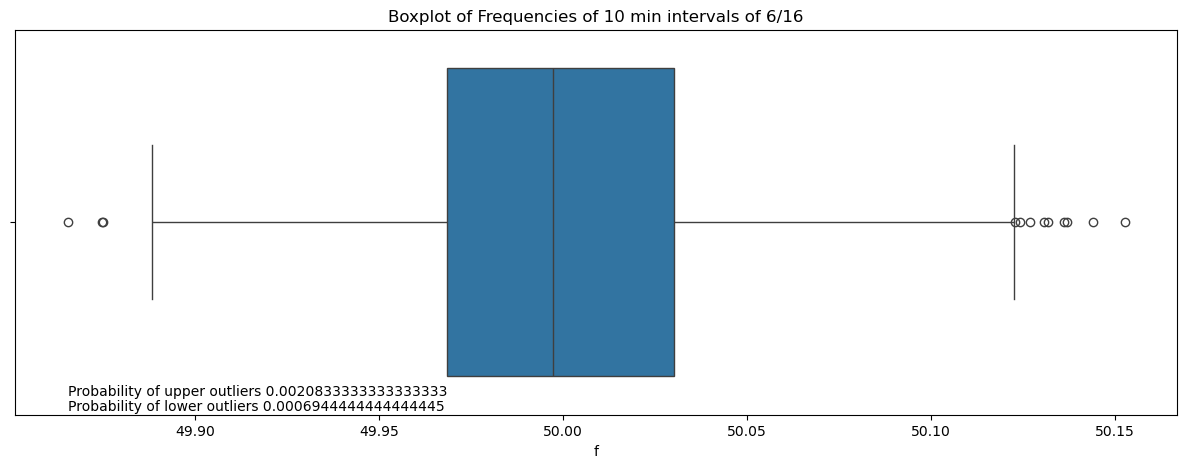

In [16]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df_10min['f'])
plt.title(f'Boxplot of Frequencies of 10 min intervals of {month}/{year}')
plt.text(df_10min['f'].min(),0.45, f'Probability of upper outliers {prob_up}', fontsize=10)
plt.text(df_10min['f'].min(),0.49, f'Probability of lower outliers {prob_low}', fontsize=10)
plt.show()

The resampled data reduces outliers greatly and gives the entire distribution a smoother shape.

## Custom Metric (CPS1) Calculation

A custom metric, Control Performance Score(CPS1) is calculated based on the deviation of frequencies from 50, normalized by a fixed parameter (e1).  
It is calculated as:

CPS_ratio = Average<sub>10 minute</sub> [(Δf × Δf)] / ε₁²  
CPS₁ = (2 - CPS_ratio) × 100%  
Δf = f - 50  
ε₁ = 0.12

The CPS1 metric is visualized, and its statistical properties like mean, standard deviation and skewness are analyzed.


In [17]:
df_10min['del_f'] = df_10min['f'] - 50

In [18]:
df1_10min = df_10min
e1 = 0.12
cps_ratio = df1_10min['del_f'] * df1_10min['del_f'] / (e1 ** 2)
cps1 = (2 - cps_ratio)*100
cps1 = cps1.to_frame(name='cps')

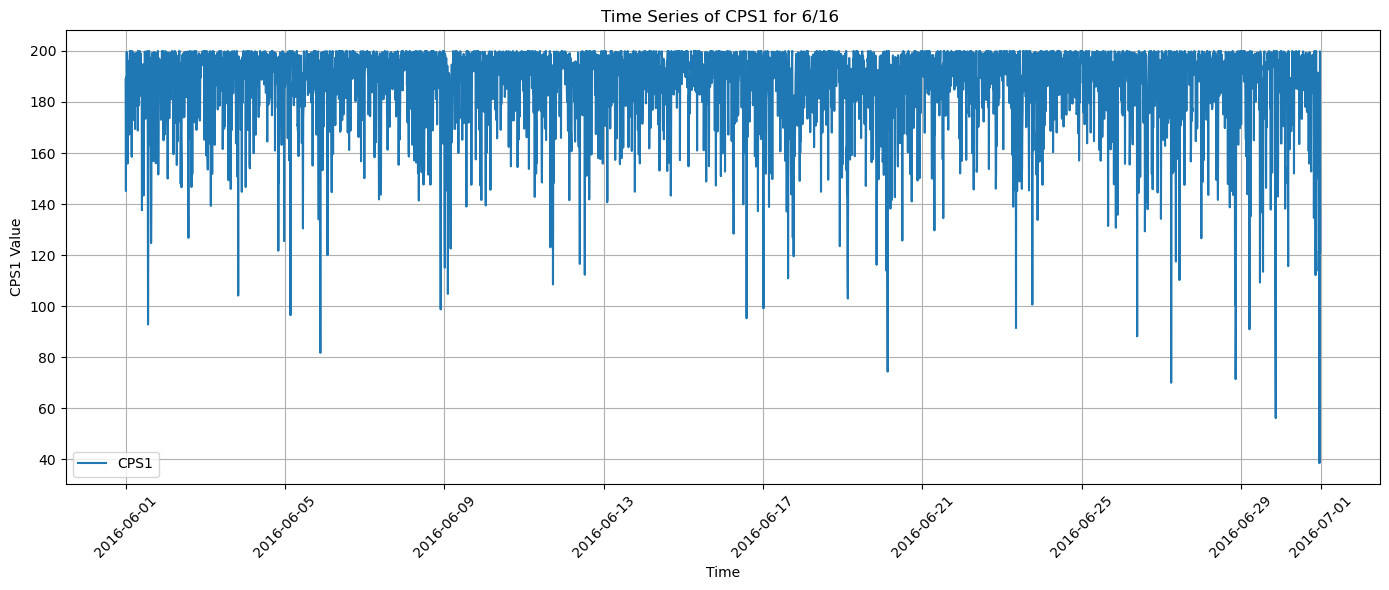

In [19]:
plt.figure(figsize=(14, 6))
plt.plot(cps1.index, cps1, label='CPS1')
plt.title(f'Time Series of CPS1 for {month}/{year} ')
plt.xlabel('Time')
plt.ylabel('CPS1 Value')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
skew_cps1 = cps1['cps'].skew()
mean_cps1 = cps1['cps'].mean()
std_cps1 = cps1['cps'].std()

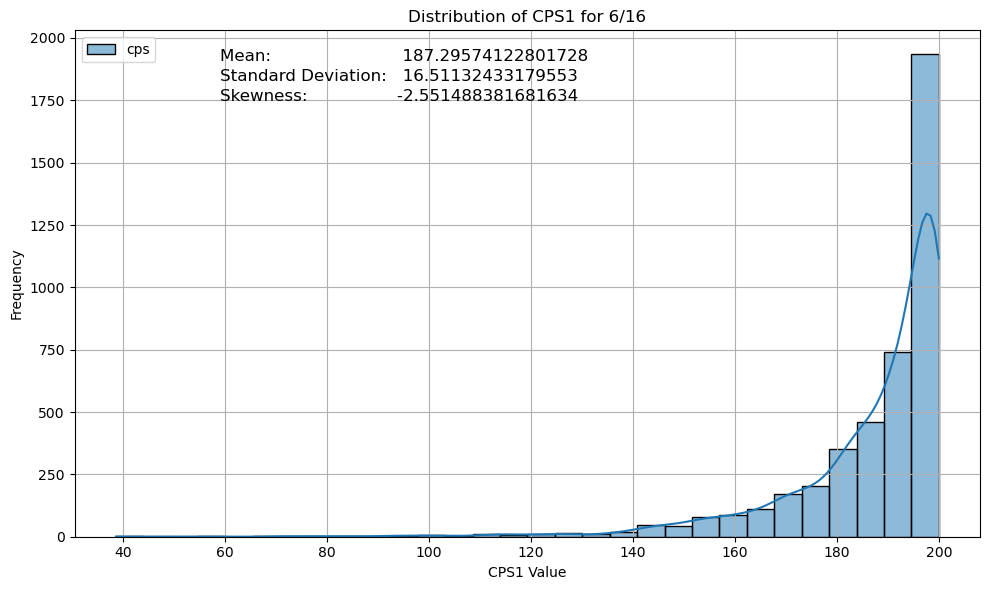

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(cps1, kde=True, bins=30, color='blue')
plt.title(f'Distribution of CPS1 for {month}/{year}')
plt.xlabel('CPS1 Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.text(x=0.16, y=0.94, s=f'Mean:                         {mean_cps1}', transform=plt.gca().transAxes, fontsize=12)
plt.text(x=0.16, y=0.90, s=f'Standard Deviation:   {std_cps1}', transform=plt.gca().transAxes, fontsize=12)
plt.text(x=0.16, y=0.86, s=f'Skewness:                 {skew_cps1}', transform=plt.gca().transAxes, fontsize=12)
plt.tight_layout()
plt.show()

In [22]:
Q1 = np.percentile(cps1['cps'], 25)
Q3 = np.percentile(cps1['cps'], 75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

up_outliers = cps1[cps1['cps'] > upper_whisker]
low_outliers = cps1[cps1['cps'] < lower_whisker]

prob_up = len(up_outliers) / len(cps1)
prob_low = len(low_outliers) / len(cps1)

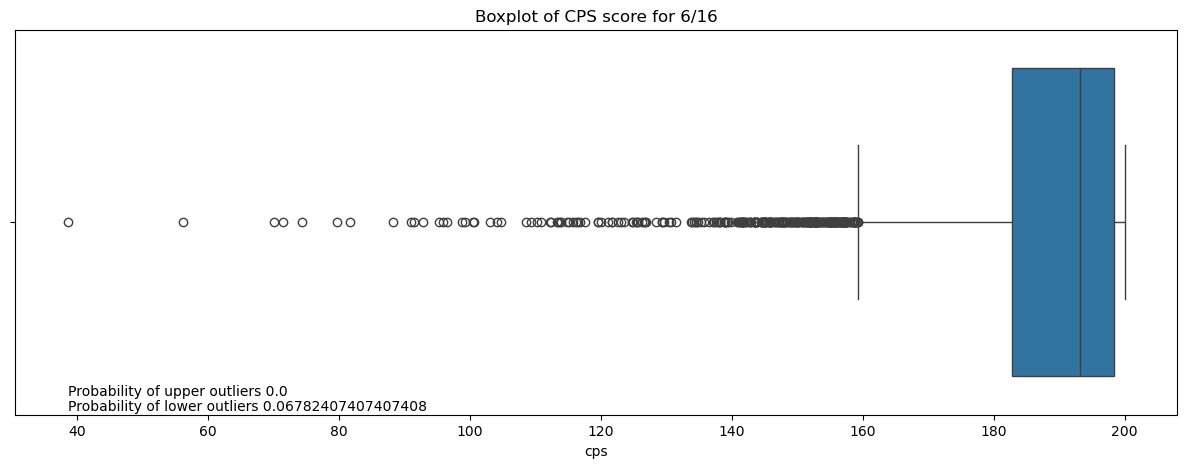

In [23]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=cps1['cps'])
plt.title(f'Boxplot of CPS score for {month}/{year}')
plt.text(cps1['cps'].min(),0.45, f'Probability of upper outliers {prob_up}', fontsize=10)
plt.text(cps1['cps'].min(),0.49, f'Probability of lower outliers {prob_low}', fontsize=10)
plt.show()